# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano; **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. Není potřeba používat sofistikované metody. _Hlavně pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model (jednoznačně popište o který konkrétně jde) a správně odhadněte, jakou **přesnost** můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **survived** a identifikátory do sloupce **ID** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

      * Snažte se vše udělat tak, aby přesnost odevzdaných predikcí na vyhodocovacím datasetu byla alespoň **75%**. Pokud bude menší, přijdete o **3 body**.
      * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami survived):
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [229]:
# Load all needed libraries 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score      
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [230]:
# Load data from the file data.csv
dt = pd.read_csv("data.csv") 

## Basic information about the dataset

In [231]:
# Display the first 10 rows of the DataFrame dt
dt.head(10)

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S,Guernsey
1,1,0,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S,"Sweden Joliet, IL"
2,2,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,NaN
3,3,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,NaN
4,4,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,"Nice, France"
5,5,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,"Montreal, PQ"
6,6,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C,"New York, NY / Washington, DC"
7,7,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,NaN
8,8,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S,NaN
9,9,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S,"Tokyo, Japan"


In [232]:
# Display common information about the DataFrame (data types,  number of values)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        796 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       1000 non-null   float64
 10  cabin      225 non-null    object 
 11  embarked   1000 non-null   object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In this task, I worked with a relatively small dataset consisting of 1,000 entries. After analyzing the dataset, I realized that its limited size might hinder the training and performance of models, so I decided to **duplicate the dataset** to simulate a larger data size.

In [233]:
# Duplicate the dataset n times
n = 10  # Number of times to duplicate
dt = pd.concat([dt] * n, ignore_index=True)
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         10000 non-null  int64  
 1   survived   10000 non-null  int64  
 2   pclass     10000 non-null  int64  
 3   name       10000 non-null  object 
 4   sex        10000 non-null  object 
 5   age        7960 non-null   float64
 6   sibsp      10000 non-null  int64  
 7   parch      10000 non-null  int64  
 8   ticket     10000 non-null  object 
 9   fare       10000 non-null  float64
 10  cabin      2250 non-null   object 
 11  embarked   10000 non-null  object 
 12  home.dest  5730 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1015.8+ KB
None


In [234]:
# Get basic data stats (count, mean, std, min, max,..), includes numeric columns
dt.describe()

,ID,survived,pclass,age,sibsp,parch,fare
count,10000.000000,10000.000000,10000.000000,7960.000000,10000.00000,10000.000000,10000.000000
mean,499.500000,0.373000,2.309000,29.894996,0.52200,0.390000,32.356224
std,288.689425,0.483626,0.835218,14.572447,1.09162,0.877483,50.031280
min,0.000000,0.000000,1.000000,0.166700,0.00000,0.000000,0.000000
25%,249.750000,0.000000,2.000000,21.000000,0.00000,0.000000,7.895800
50%,499.500000,0.000000,3.000000,28.000000,0.00000,0.000000,14.458300
75%,749.250000,1.000000,3.000000,39.000000,1.00000,0.000000,31.068750
max,999.000000,1.000000,3.000000,80.000000,8.00000,9.000000,512.329200


In [235]:
# Summary of all column types, regardless of data type 
dt.describe(include='all')

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
count,10000.000000,10000.000000,10000.000000,10000,10000,7960.000000,10000.00000,10000.000000,10000,10000.000000,2250,10000,5730
unique,NaN,NaN,NaN,998,2,NaN,NaN,NaN,747,NaN,155,3,308
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,"New York, NY"
freq,NaN,NaN,NaN,20,6470,NaN,NaN,NaN,100,NaN,50,7140,460
mean,499.500000,0.373000,2.309000,NaN,NaN,29.894996,0.52200,0.390000,NaN,32.356224,NaN,NaN,NaN
std,288.689425,0.483626,0.835218,NaN,NaN,14.572447,1.09162,0.877483,NaN,50.031280,NaN,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,0.166700,0.00000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,249.750000,0.000000,2.000000,NaN,NaN,21.000000,0.00000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,499.500000,0.000000,3.000000,NaN,NaN,28.000000,0.00000,0.000000,NaN,14.458300,NaN,NaN,NaN
75%,749.250000,1.000000,3.000000,NaN,NaN,39.000000,1.00000,0.000000,NaN,31.068750,NaN,NaN,NaN


In [236]:
# Check and display the sum of null values for each column 
dt.isnull().sum()

ID              0
survived        0
pclass          0
name            0
sex             0
age          2040
sibsp           0
parch           0
ticket          0
fare            0
cabin        7750
embarked        0
home.dest    4270
dtype: int64

### Data types and values for each column:
#### 1.` ID`:
Contains unique integer values, likely serving as a unique identifier for each record.
#### 2. `survived`:
Likely a binary indicator (0 or 1), possibly representing whether a passenger survived (1) or not (0).
#### 3. `pclass`:
Represents passenger class, taking values like 1, 2, or 3.
#### 4.` name`:
Stores the name of each passenger as text.
#### 5. `sex`:
Indicates the gender of the passenger (e.g., "male" or "female").
#### 6. `age`:
Stores the age of each passenger. The float64 type suggests age values may include decimal places, though ages are typically whole numbers.

Null Values: 2040 (20.4% missing data)
#### 7. `sibsp`:
Indicates the number of siblings or spouses each passenger had aboard.
#### 8. `parch`:
Represents the number of parents or children each passenger had aboard.
#### 9. `ticket`:
Contains ticket numbers or codes. These may vary in format and are stored as text.
#### 10. `fare`:
Represents the fare paid by each passenger. This column includes decimal values.
#### 11. `cabin`:
Stores cabin information for each passenger, if available. Cabin values may have diverse formats, and most values are missing.

Null Values: 7750 (77.5% missing data)
#### 12. `embarked`:
Represents the port of embarkation. This is likely a categorical variable, possibly using codes like "C," "Q," and "S" to represent different locations.
#### 13. `home.dest`:
Indicates the passengers' home destinations. Given as text and may have varied formats, including city names or regions.

Null Values: 4270 (42.7% missing data)

## Basic data pre-processing

`'ID', 'name', 'ticket', 'cabin', 'home.dest'`

These features have no effect on human survival so they can be removed from dataset.

In [237]:
# Drop features
dt.drop(columns=['ID', 'name', 'ticket', 'cabin', 'home.dest'], inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  10000 non-null  int64  
 1   pclass    10000 non-null  int64  
 2   sex       10000 non-null  object 
 3   age       7960 non-null   float64
 4   sibsp     10000 non-null  int64  
 5   parch     10000 non-null  int64  
 6   fare      10000 non-null  float64
 7   embarked  10000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 625.1+ KB


The column `sex` will be changed. Convert information about genders to a boolean-like format represented by integers, where `0` represents "female" and `1` represents "male". That is making it more suitable for numerical or machine learning applications.

In [238]:
# Change column 'sex' to boolean
dt['sex'] = dt['sex'].map({'female': 0, 'male': 1}).astype(int)
print(dt['sex'].head(10))

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    1
9    1
Name: sex, dtype: int64


Transform the column `embarked` to make it more suitable for analysis and machine learning models that require numeric input.

Converts the categorical column embarked into multiple binary (0/1) columns.
Each unique value in embarked (C, Q, and S) is turned into a separate column. The original embarked column is removed, and three new columns `embarked_C`, `embarked_Q`, and `embarked_S` are created. 

In [239]:
# Encode 'embarked' using pd.get_dummies
dt = pd.get_dummies(dt, columns=['embarked'], prefix='embarked')
print(dt.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked_C  embarked_Q  \
0         0       2    1  23.0      0      0  10.5000           0           0   
1         0       3    1  24.0      0      0   7.7750           0           0   
2         0       3    1  28.5      0      0   7.2292           1           0   
3         0       3    1  16.0      0      0   9.2167           0           0   
4         1       2    1   3.0      1      1  26.0000           0           0   

   embarked_S  
0           1  
1           1  
2           0  
3           1  
4           1  


These steps helped to clean, standardize and encode the data, making it fully numeric and the dataset was set for effective use.

The only thing left is to fill missing values. This task will be done after splitting the dataset.

## Data Splitting (training, testing, validation)

Separate the dataset into `features` (Xdata) and the `target variable` (ydata). This separation is essential for training a machine learning model, as it allows the model to learn the relationship between the features (Xdata) and the target (ydata). 

In [240]:
Xdata = dt.drop("survived", axis=1)
ydata = dt.survived

Split the data into 3 subsets:
- `train` - serves for training, 

the model learns from this data and adjusts its parameters to minimize errors on it.
- `val` - serves for comparison of models (validation),

use the validation set to tune hyperparameters (settings that control the model’s behavior)
- `test` - subsequent prediction of the performance of the final model (test),
 
is reserved strictly for evaluating the final, fully-trained model, verify how well the delivered solution works on unseen data.

In [241]:
# Divide data into 3 subsets (training, validation, testing)
rd_seed = 333
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed) 
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 

Got three subsets: training (60% of the data), validation (20%), and testing (20%).

Final step is handle missing data in the column `age` by replacing NaN values with the average age, maintaining data completeness for analysis or modeling. 

In [242]:
dt.isnull().sum(axis=0)

survived         0
pclass           0
sex              0
age           2040
sibsp            0
parch            0
fare             0
embarked_C       0
embarked_Q       0
embarked_S       0
dtype: int64

Firstly, calculate the mean (average) of the `age` column and stores it in the variable mean_age. Secondly, fill any missing values (NaN) in the `age` column with the calculated mean value.

In [243]:
# Calculate the mean of the 'age' column 
mean_age_train = Xtrain['age'].mean()
mean_age_val = Xval['age'].mean()
mean_age_test = Xtest['age'].mean()

# Create copies of each subset with filled missing values
Xtrain = Xtrain.copy()
Xval = Xval.copy()
Xtest = Xtest.copy()

# Fill missing values in 'age' using the means calculated for each subset
Xtrain['age'] = Xtrain['age'].fillna(mean_age_train)
Xval['age'] = Xval['age'].fillna(mean_age_val)
Xtest['age'] = Xtest['age'].fillna(mean_age_test)

# Decision tree

For the prepared data, apply a decision tree method. 

In [244]:
# Define hyperparameter combinations
param_grid = {
    'max_depth': range(2, 25), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)

To achieve the best performance in my task, I experimented with different ranges for the `max_depth` parameter during the preparation phase. By testing various ranges, I observed that a `max_depth` range from 2 to 25 consistently provided the highest accuracy scores and ROC-AUC values on both the training and validation sets.

In [245]:
# Initializing lists for accuracy scores
train_acc = []
val_acc = []

Best Params Found: {'max_depth': 19, 'criterion': 'entropy'}


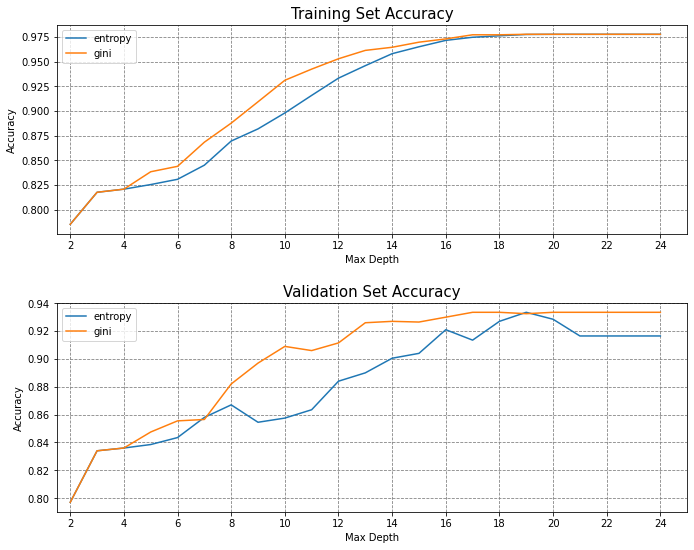

In [246]:
# Initializing lists for accuracy scores
train_acc_by_criterion = {'entropy': [], 'gini': []}
val_acc_by_criterion = {'entropy': [], 'gini': []}

# Grid search to find the best hyperparameters
for params in param_comb:
    # Initialize DecisionTreeClassifier with those parameters
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'], random_state=42)
    # Train the decision tree using training data
    dt.fit(Xtrain, ytrain)
    # Append the accuracy of the model for training and validation datasets
    train_acc_by_criterion[params['criterion']].append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc_by_criterion[params['criterion']].append(metrics.accuracy_score(yval, dt.predict(Xval)))

# Identify the best parameters based on maximum validation accuracy
val_acc_flat = [acc for criterion_acc in val_acc_by_criterion.values() for acc in criterion_acc]
best_params = param_comb[np.argmax(val_acc_flat)]
print("Best Params Found:", best_params)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Training set
for criterion in ['entropy', 'gini']:
    axes[0].plot(range(2, 25), train_acc_by_criterion[criterion], label=criterion)

axes[0].set_xlim(1.5, 25)
axes[0].set_xticks(range(2, 26, 2))  # Adjust the tick intervals as needed
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training Set Accuracy', fontdict={'fontsize': 15})
axes[0].legend()
axes[0].grid(color='grey', linestyle='--')

# Validation set
for criterion in ['entropy', 'gini']:
    axes[1].plot(range(2, 25), val_acc_by_criterion[criterion], label=criterion)

axes[1].set_xlim(1.5, 25)
axes[1].set_xticks(range(2, 26, 2))  # Adjust the tick intervals as needed
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Validation Set Accuracy', fontdict={'fontsize': 15})
axes[1].legend()
axes[1].grid(color='grey', linestyle='--')

# Adjust layout and show the plot
fig.tight_layout(pad=2.0)
plt.show()

The plots show the accuracy of a decision tree classifier on both the training and validation sets as the maximum depth (max_depth) parameter of the tree increases, for two different splitting criteria: "entropy" and "gini."

Training Set Accuracy (Top Plot)

As max_depth increases, the training accuracy steadily increases for both "entropy" and "gini" criteria.
As the depth increases, the model becomes more complex and better fits the training data, achieving higher accuracy.


Validation Set Accuracy (Bottom Plot)

Accuracy reaches its peak at max_depth = 19 for both criteria, with a noticeable dip after this point.

In [247]:
# Training DecisionTree with the best hyperparameters
best_tree = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'])
best_tree.fit(Xtrain, ytrain)

# Evaluating the model on the test set
test_accuracy = metrics.accuracy_score(ytest, best_tree.predict(Xtest))
test_f1_score = metrics.f1_score(ytest, best_tree.predict(Xtest))

# Printing the results
print('Test set accuracy score: {0:.6f}'.format(test_accuracy))
print('Test set F1 score:       {0:.6f}'.format(test_f1_score))

# Validating DecisionTree with the best hyperparameters
best_tree.fit(Xval, yval)

# Evaluating the model on the validation set
val_accuracy_dt = metrics.accuracy_score(yval, best_tree.predict(Xval))
val_f1_score_dt = metrics.f1_score(yval, best_tree.predict(Xval))

# Printing the results
print('Validation set accuracy score: {0:.6f}'.format(val_accuracy_dt))
print('Validation set F1 score:       {0:.6f}'.format(val_f1_score_dt))

Test set accuracy score: 0.923500
Test set F1 score:       0.906077
Validation set accuracy score: 0.976500
Validation set F1 score:       0.966211


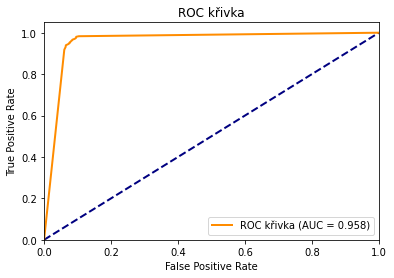

In [248]:
fpr, tpr, thresholds = metrics.roc_curve(yval, dt.predict_proba(Xval)[:, 1])

# AUC = metrics.auc(fpr, tpr)
AUC = metrics.roc_auc_score(yval, dt.predict_proba(Xval)[:, 1])

plt.figure()
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(fpr, tpr, color="darkorange", lw=2, label = f"ROC křivka (AUC = {AUC:.3f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC křivka")
plt.legend(loc="lower right")
plt.show()

AUC = 0.958

The ROC curve demonstrates that the model performs well on this  binary classification model, with an AUC of 0.958 indicating it has good predictive power.

# kNN (KNearestNeighbors)

Perform a hyperparameter search for a K-Nearest Neighbors (kNN) classifier using two different scaling techniques, `MinMaxScaler` and `StandardScaler`, to find the best model configuration based on F1 score.

Firstly, apply both `MinMaxScaler` and `StandardScaler` to the training data. These scalers ensure that features are on the same scale, which improves the performance and reliability of the kNN model by giving each feature an equal influence on the distance calculations.

In [249]:
# MinMax Scaling
mm_scaler = MinMaxScaler()

mm_Xtrain = mm_scaler.fit_transform(Xtrain)
mm_Xval = mm_scaler.transform(Xval)
mm_Xtest = mm_scaler.transform(Xtest)

# Standard Scaling
st_scaler = StandardScaler()

st_Xtrain = st_scaler.fit_transform(Xtrain)
st_Xval = st_scaler.transform(Xval)
st_Xtest = st_scaler.transform(Xtest)

Secondly, define a grid of hyperparameters for the kNN model. ParameterGrid creates a list of all combinations, which will be tested to find the best-performing configuration.

In [250]:
# Hyperparameter combinations for KNN
param_grid = {
    'n_neighbors': range(1, 31),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy for neighbors
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}
param_combinations = ParameterGrid(param_grid)  # Generate all possible combinations

For each combination of hyperparameters, a kNN model is trained separately on the MinMax-scaled and Standard-scaled data, and the F1 score is calculated on the validation set.

In [251]:
# Lists for collecting results
mm_val_f1_scores = []  # F1 scores for MinMaxScaler
st_val_f1_scores = []  # F1 scores for StandardScaler
mm_val_accuracy_scores = []  # Accuracy scores for MinMaxScaler
st_val_accuracy_scores = []  # Accuracy scores for StandardScaler

# Collect results
for params in param_combinations:
    # Create KNN classifier with specified hyperparameters
    knn = KNeighborsClassifier(
        n_neighbors=params['n_neighbors'],
        metric=params['metric'],
        weights=params['weights'],
    )

    # Training and evaluating with MinMaxScaler
    knn.fit(mm_Xtrain, ytrain)
    mm_val_accuracy_scores.append(accuracy_score(yval, knn.predict(mm_Xval)))
    mm_val_f1_scores.append(f1_score(yval, knn.predict(mm_Xval)))

    # Training and evaluating with StandardScaler
    knn.fit(st_Xtrain, ytrain)
    st_val_accuracy_scores.append(accuracy_score(yval, knn.predict(st_Xval)))
    st_val_f1_scores.append(f1_score(yval, knn.predict(st_Xval)))

In [252]:
# Find best hyperparameters 
mm_best_params = param_combinations[np.argmax(mm_val_f1_scores)]
st_best_params = param_combinations[np.argmax(st_val_f1_scores)]

# Print results for MinMaxScaler
print("Using MinMaxScaler:")
print("Best Params:", mm_best_params)
print("Best Accuracy Score:", max(mm_val_accuracy_scores))
print("Best F1 Score:", max(mm_val_f1_scores))

# Print results for StandardScaler
print("\nUsing StandardScaler:")
print("Best Params:", st_best_params)
print("Best Accuracy Score:", max(st_val_accuracy_scores))
print("Best F1 Score:", max(st_val_f1_scores))

# Select the best hyperparameters based on the higher F1 score
best_params = st_best_params if max(st_val_f1_scores) > max(mm_val_f1_scores) else mm_best_params
print("\nOverall Best Params:", best_params)
print("Overall Best Accuracy Score:", max(max(st_val_accuracy_scores), max(mm_val_accuracy_scores)))
print("Overall Best F1 Score:", max(max(st_val_f1_scores), max(mm_val_f1_scores)))

Using MinMaxScaler:
Best Params: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}
Best Accuracy Score: 0.9665
Best F1 Score: 0.9526501766784452

Using StandardScaler:
Best Params: {'weights': 'distance', 'n_neighbors': 26, 'metric': 'manhattan'}
Best Accuracy Score: 0.966
Best F1 Score: 0.9519774011299434

Overall Best Params: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}
Overall Best Accuracy Score: 0.9665
Overall Best F1 Score: 0.9526501766784452


Using the best hyperparameters found, train the model on the validation set and evaluate the Accuracy and F1 scores.

In [253]:
# Create KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)

# Select the best scaling method based on validation performance
if best_params == mm_best_params:
    best_knn.fit(mm_Xval, yval)
    test_predictions = best_knn.predict(mm_Xval)
else:
    best_knn.fit(st_Xval, yval)
    test_predictions = best_knn.predict(st_Xval)

# Calculate F1 and accuracy scores on the validation set
val_accuracy_score = accuracy_score(yval, test_predictions)
val_f1_score = f1_score(yval, test_predictions)
print(f'Validation Set Accuracy Score: {val_accuracy_score:.8f}')
print(f'Validation Set F1 Score: {val_f1_score:.8f}')


Validation Set Accuracy Score: 0.97950000
Validation Set F1 Score: 0.97065140


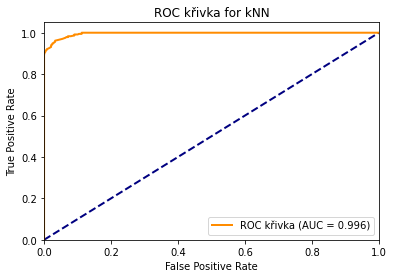

In [254]:
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(yval, knn.predict_proba(st_Xval)[:, 1])

AUC_knn = metrics.roc_auc_score(yval, knn.predict_proba(st_Xval)[:, 1])

plt.figure()
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(fpr_knn, tpr_knn, color="darkorange", lw=2, label = f"ROC křivka (AUC = {AUC_knn:.3f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC křivka for kNN")
plt.legend(loc="lower right")
plt.show()

AUC = 0.996

Plot the ROC curve for a k-Nearest Neighbors (kNN) classifier. An AUC of 0.996 suggests that this kNN model has a strong ability to distinguish between the two classes in the dataset.

## Compare methods: Decision tree vs kNN

In the task I should decide which metod is better. Each method has own advantages and disadvantages. 

Decision Tree is easy to interpret because they mimic human decision-making (i.e., splitting based on feature values); handles both numerical and categorical data; do not require scaling of the input data. But however Decision Trees tend to overfit the training data if not properly pruned (controlled via hyperparameters like max_depth); also small changes in the data can lead to large changes in the tree structure, making them less stable; might perform poorly if the data has too many features or complex interactions unless tuned properly.


k-Nearest Neighbors (kNN) works well for a wide variety of data types, but becomes slow and inefficient for large datasets; can be affected by noisy data and outliers; requires scaling of features (MinMaxScaler or StandardScaler) because it relies on distance metrics; as the number of features increases, kNN performance can degrade significantly if the data is sparse in high-dimensional space.


Compare the ROC curves of both models on the same plot. 

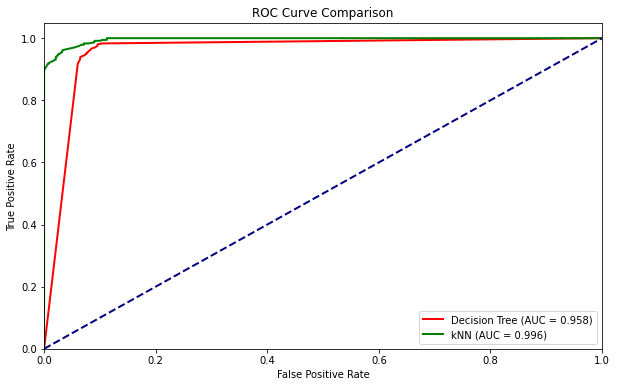

In [255]:
# Plotting both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color="red", lw=2, label=f"Decision Tree (AUC = {AUC:.3f})")
plt.plot(fpr_knn, tpr_knn, color="green", lw=2, label=f"kNN (AUC = {AUC_knn:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

Compare the accuracy and F1 scores for two different models on a validation set. 

In [256]:
# Decision Tree Model 
print("Decision Tree:")
print(f'Validation Set Accuracy Score: {val_accuracy_dt:.8f}')
print(f'Validation Set F1 Score: {val_f1_score_dt:.8f}')
print(f'Validation Set AUC Score: {AUC:.8f}')

#kNN
print("\nkNN:")
print(f'Validation Set Accuracy Score: {val_accuracy_score:.8f}')
print(f'Validation Set F1 Score: {val_f1_score:.8f}')
print(f'Validation Set AUC Score: {AUC_knn:.8f}')

Decision Tree:
Validation Set Accuracy Score: 0.97650000
Validation Set F1 Score: 0.96621136
Validation Set AUC Score: 0.95794199

kNN:
Validation Set Accuracy Score: 0.97950000
Validation Set F1 Score: 0.97065140
Validation Set AUC Score: 0.99607295


**kNN** seems to be the better model.
The kNN classifier outperforms the Decision Tree classifier in terms of F1 and AUC scores on the validation set. kNN achieves a higher F1 score, suggesting better precision and recall balance for this particular task.

When the best model is chosen, it is time to test the **kNN model** with the best hyperparameters on the `testing data`.

In [257]:
# Train the kNN model using the selected scaling method
if best_params == mm_best_params:
    best_knn.fit(mm_Xval, yval)  # Fit using MinMax-scaled data
    final_predictions = best_knn.predict(mm_Xtest)  # Predict on test data
else:
    best_knn.fit(st_Xval, yval)  # Fit using Standard-scaled data
    final_predictions = best_knn.predict(st_Xtest)  # Predict on test data
    
# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(ytest, final_predictions)
test_f1_score = f1_score(ytest, final_predictions)
test_auc_score = metrics.roc_auc_score(ytest, best_knn.predict_proba(Xtest)[:, 1])

# Print the results for the test set
print(f'Test Set Accuracy Score: {test_accuracy:.8f}')
print(f'Test Set F1 Score: {test_f1_score:.8f}')
print(f'Test Set AUC Score: {test_auc_score:.8f}')

Test Set Accuracy Score: 0.92850000
Test Set F1 Score: 0.90447562
Test Set AUC Score: 0.76282670


The performance of the kNN model, based on testing subset, is very well. The model achieves excellent accuracy and F1 scores, indicating strong generalization on the test set.

Expected performance on new data: Based on the current results, I expect reasonable accuracy around 90% and F1 scores around ~0.90 too, but there may be a drop in performance if the new data is different from the test set.

## Evaluation data and results.csv

The final part of the task, load the evaluation dataset from `evaluation.csv` into a pandas DataFrame.

In [258]:
eval = pd.read_csv('evaluation.csv')
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        250 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       308 non-null    float64
 9   cabin      70 non-null     object 
 10  embarked   307 non-null    object 
 11  home.dest  172 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB


#### Data Preprocessing
Preprocessing steps were applied to ensure the evaluation data matched the format of the training data.

In [259]:
ids = eval['ID']
# Drop features
eval.drop(columns=['ID', 'name', 'ticket', 'cabin', 'home.dest'], inplace=True)

# Change column 'sex' to boolean
eval['sex'] = eval['sex'].map({'female': 0, 'male': 1}).astype(int)

# Encode 'embarked' using pd.get_dummies
eval = pd.get_dummies(eval, columns=['embarked'], prefix='embarked')

# Calculate the mean of the 'age' column
mean_age = eval['age'].mean()

# Replace missing values (NaN) in the 'age' column with the calculated mean
eval['age'].fillna(mean_age, inplace=True)

# For 'fare'
mean_fare = eval['fare'].mean()
eval['fare'].fillna(mean_fare, inplace=True)

eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      309 non-null    int64  
 1   sex         309 non-null    int64  
 2   age         309 non-null    float64
 3   sibsp       309 non-null    int64  
 4   parch       309 non-null    int64  
 5   fare        309 non-null    float64
 6   embarked_C  309 non-null    uint8  
 7   embarked_Q  309 non-null    uint8  
 8   embarked_S  309 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 15.5 KB


Applied the scaler (StandardScaler) used during training to scale the features in the evaluation dataset.

In [260]:
# Apply scaler
eval = st_scaler.transform(eval)

The preprocessed evaluation data was fed into the final model (k-Nearest Neighbors) to generate predictions.

Predictions were stored as a numpy array and then converted to a pandas Series for easier handling.

In [261]:
# Get predictions using K-nearest neighbors model
predictions = knn.predict(eval)

# Convert predictions from numpy array to pandas Series
predictions = pd.Series(predictions) 
print(predictions)

0      1
1      0
2      0
3      1
4      0
      ..
304    1
305    0
306    1
307    0
308    0
Length: 309, dtype: int64


Create a new DataFrame containing two columns(`ID`, `survived`).
Rename the columns to match the required format. Make sure that the final step is fully adhered to the submission format, ensuring the evaluator can easily check my results.

In [262]:
results = pd.concat([ids, predictions], axis=1) # create dataframe 
results.rename(columns={0:'survived'}, inplace=True) # rename column
results

,ID,survived
0,1000,1
1,1001,0
2,1002,0
3,1003,1
4,1004,0
...,...,...
304,1304,1
305,1305,0
306,1306,1
307,1307,0


Save this DataFrame to a CSV file named `results.csv`. 

In [263]:
results.to_csv('results.csv', index=False)